# Project Descreption

The Objective of this project is :

1.   Use the OpenFoodFact   that shows  characteristics of certain product groups, similarities between products and product groups, to provide a global view of the dataset, and exhibit salient features that are of interest for an analyst or stakeholder in this sector.

2.   Use some machine learning algorithms to : 

        *   predict the **nutriscore_grade** of a product given nutritional values and possibly other fields (as few as possible)
        *   predict the **nova_group** of a product given nutritional values and possibly other fields (as few as possible),
        *   predict the **pnns_groups_1** of a product given nutritional values and possibly other fields (as few as possible),
        *   predict the **pnns_groups_2** of a product given nutritional values and possibly other fields (as few as possible),
        *   predict the **categories** (either atomic categories or lists of categories) of a product given nutritional values and possibly other fields (as few as possible),
        *   predict one or more **nutritional values** (ex: sugars_100g) given nutritional values and possibly other fields (as few as possible)
        






# Importing the Libraries

In [10]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from scipy.stats import norm, skew
import numpy as np
import seaborn as sns
from sklearn.preprocessing import  StandardScaler,  LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import statsmodels.api as sm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
import lightgbm as lgb
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor


# Importing the dataset

In [13]:
data = pd.read_csv('C:/Users/DELL/Desktop/off_complete.csv', sep = '\t')

In [14]:
data.shape

(143716, 29)

In [15]:
data.head()


,code,url,product_name,brands,categories,countries_tags,additives_tags,nutriscore_score,nutriscore_grade,nova_group,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0000000020114,http://world-fr.openfoodfacts.org/produit/0000...,Naturablue original,Natura4Ever,Compléments alimentaires,en:france,en:e422,NaN,NaN,4.0,...,0.0,NaN,0.00,NaN,NaN,NaN,0.08000,NaN,NaN,NaN
1,0000000290616,http://world-fr.openfoodfacts.org/produit/0000...,Salade Cesar,Kirkland Signature,"Aliments et boissons à base de végétaux, Alime...",en:canada,"en:e341,en:e341i,en:e415,en:e517",6.0,c,4.0,...,0.0,2.00,22.00,2.160,0.864,0.000000,0.00000,0.0000,0.00000,6.0
2,0000000394710,http://world-fr.openfoodfacts.org/produit/0000...,Danoises à la cannelle roulées,Kirkland Signature,"Snacks, Snacks sucrés, Biscuits et gâteaux, Pâ...",en:canada,"en:e1100,en:e202,en:e203,en:e330,en:e406,en:e4...",NaN,NaN,4.0,...,28.1,2.05,4.79,0.922,0.369,0.000205,0.00616,0.0548,0.00247,NaN
3,0000000491228,http://world-fr.openfoodfacts.org/produit/0000...,Entremets Crème Brulée,Comme j'aime,"Produits laitiers, Desserts, Produits déshydra...",en:france,"en:e102,en:e110,en:e407,en:e471",2.0,b,4.0,...,69.8,0.10,6.80,0.500,0.200,NaN,NaN,NaN,NaN,2.0
4,0000001938067,http://world-fr.openfoodfacts.org/produit/0000...,Chaussons tressés aux pommes,Kirkland Signature,"Snacks, Snacks sucrés, Biscuits et gâteaux, Vi...",en:canada,"en:e202,en:e211,en:e330",9.0,c,4.0,...,24.7,2.00,3.33,0.647,0.259,0.000000,0.00160,0.0133,0.00048,9.0


# Data Visualisation

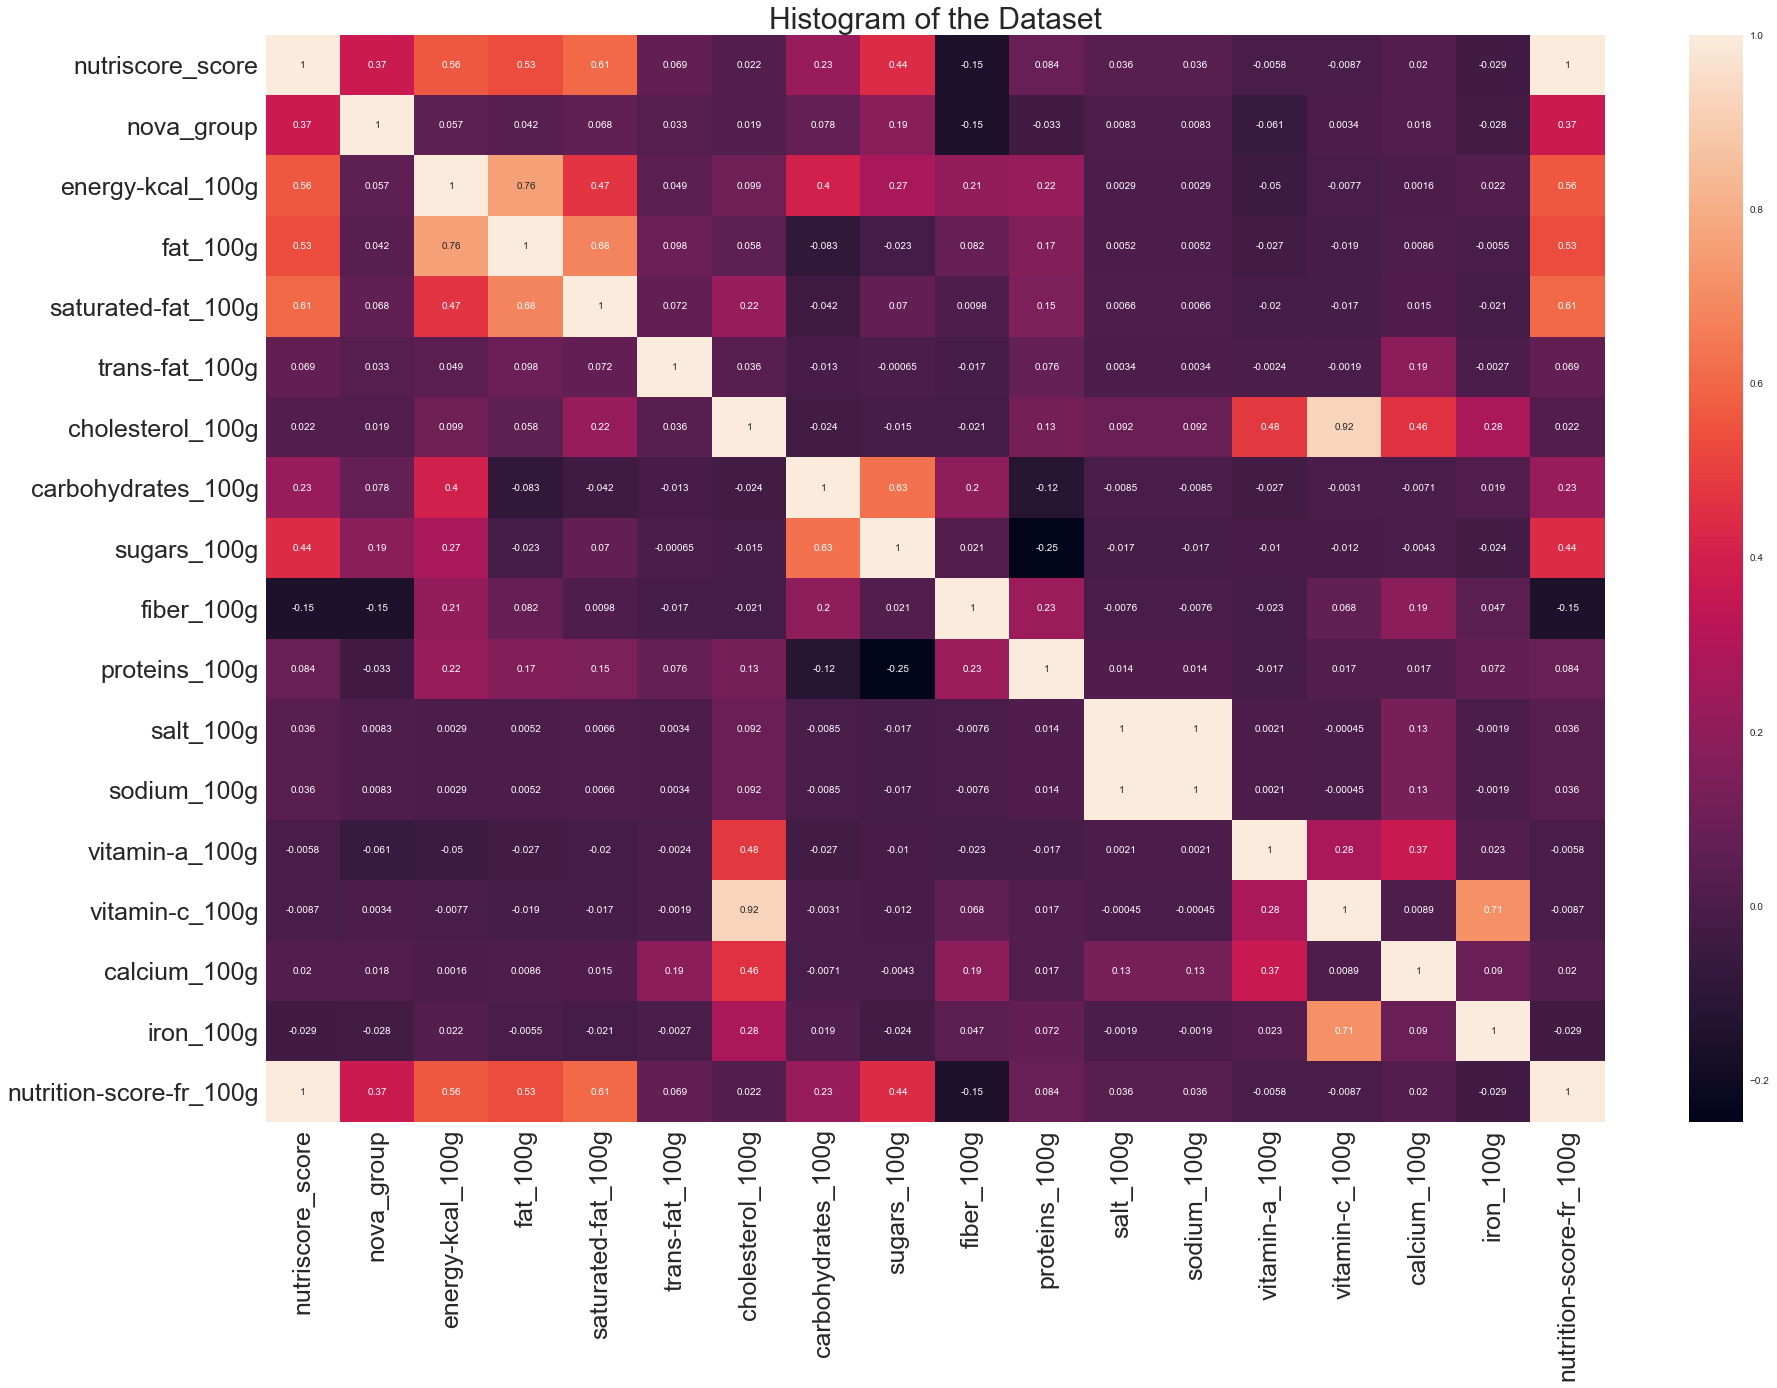

In [16]:
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data.corr(), annot = True)
plt.title('Histogram of the Dataset', fontsize = 30)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.show()

**Note :**
From the heatmap, we can see that **Nutriscore_score** and **Nutriscore_score_fr** are totaly correlated, and **Sodium** and **Salt** too, so we can delete them.

In [17]:
data.drop(['salt_100g'], 1, inplace=True)
data.drop(['nutrition-score-fr_100g'], 1, inplace=True)

**Comparison the nutriscore grade for every code**

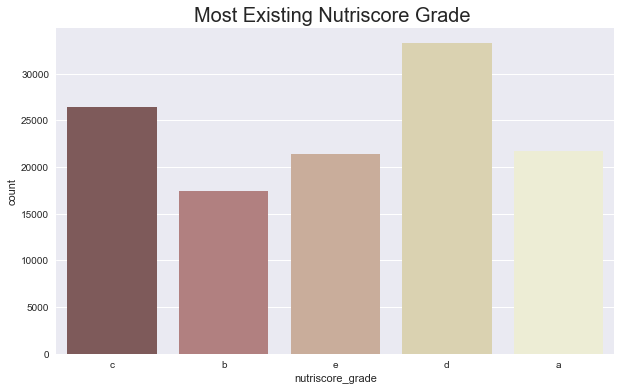

In [18]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.countplot(data['nutriscore_grade'], palette = 'pink')
plt.title('Most Existing Nutriscore Grade ', fontsize = 20)
plt.show()

**comparison of nova_group for every code**

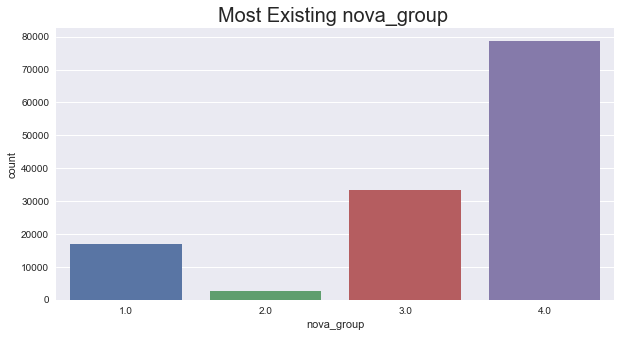

In [19]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['nova_group'])
plt.title('Most Existing nova_group ', fontsize = 20)
plt.show()

different pnns_groups_1 acquired by the the products

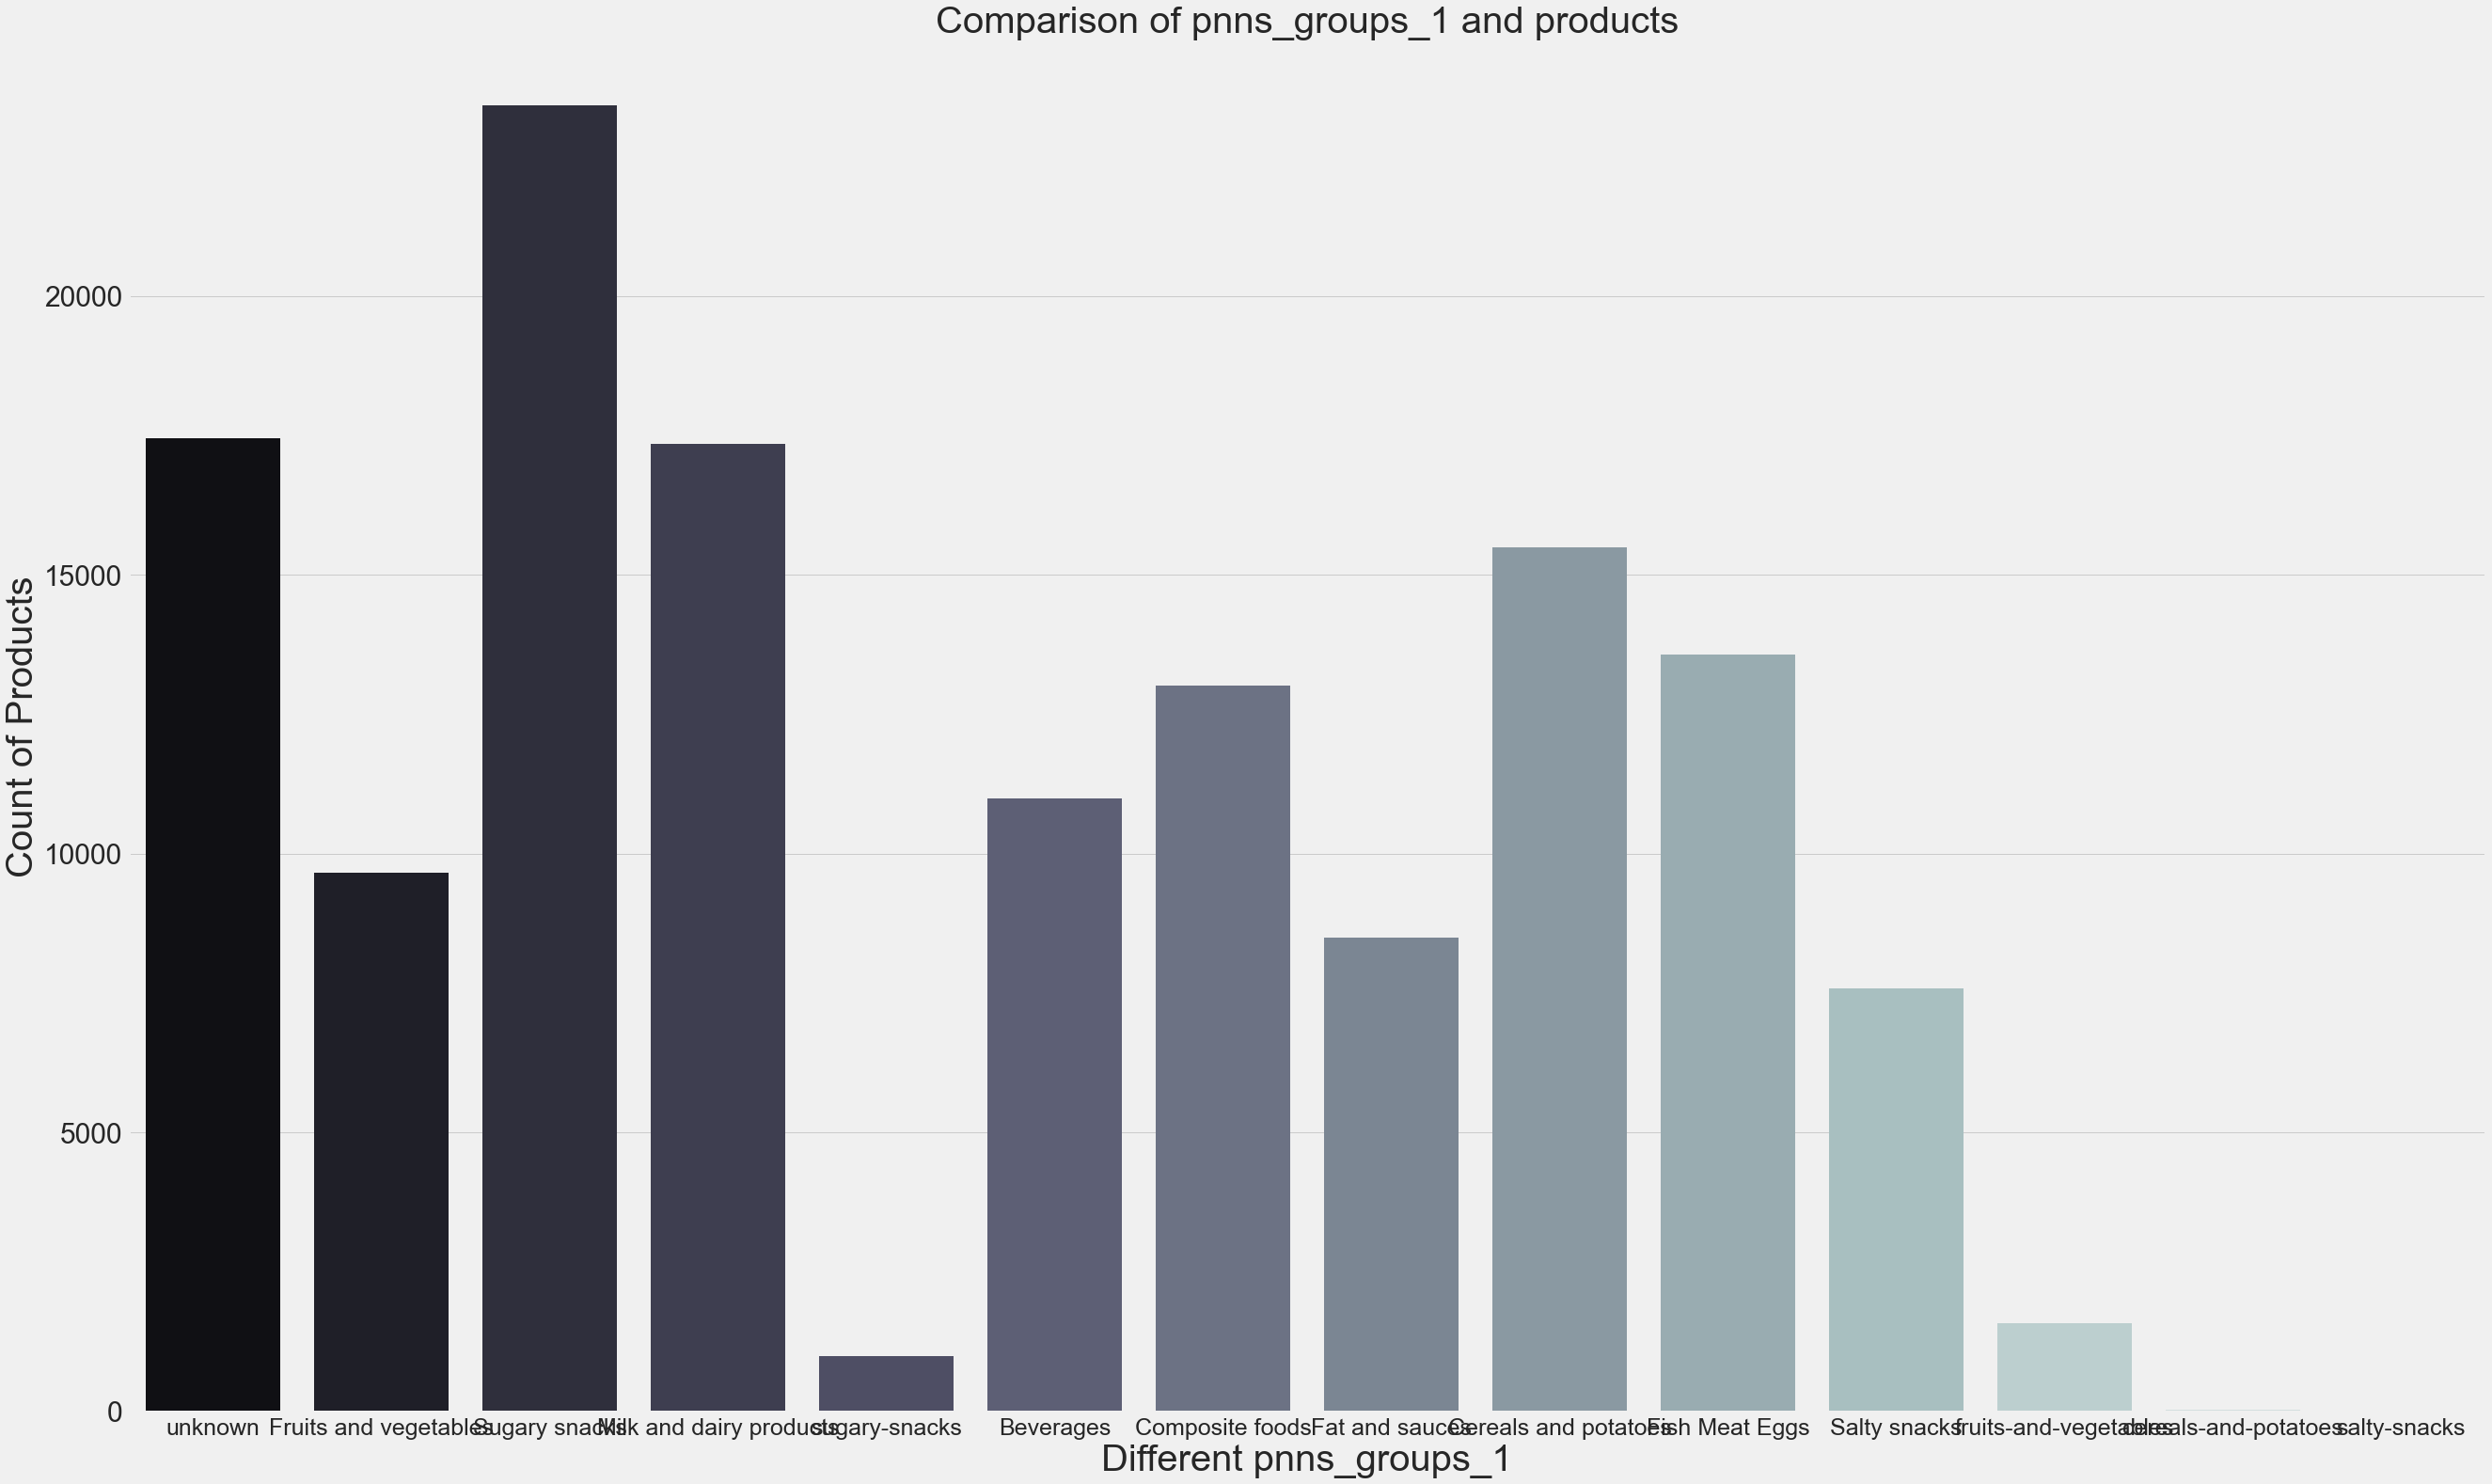

In [20]:
plt.rcParams['figure.figsize'] = (40, 25)

plt.style.use('fivethirtyeight')
ax = sns.countplot(data['pnns_groups_1'], palette = 'bone')
ax.set_xlabel(xlabel = 'Different pnns_groups_1', fontsize = 40)
ax.set_ylabel(ylabel = 'Count of Products', fontsize = 40)
ax.set_title(label = 'Comparison of pnns_groups_1 and products', fontsize = 40)
plt.xticks(size = 25)
plt.yticks(size = 30)
plt.show()

**Comparing the product's nutriscore_score**

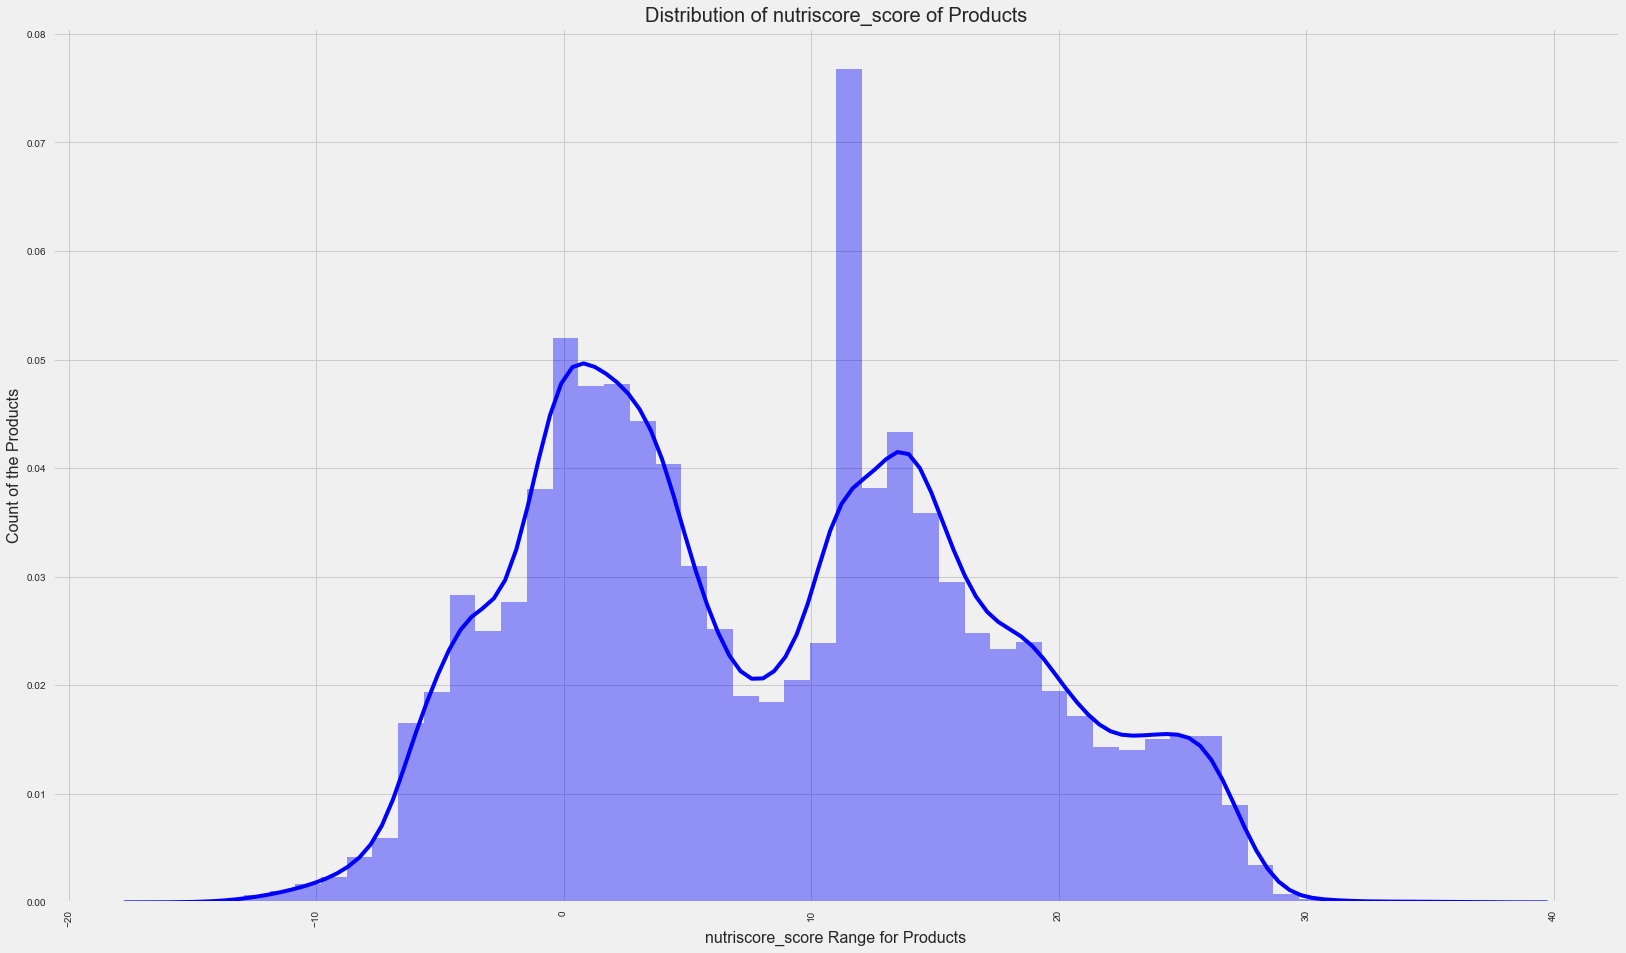

In [21]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (25, 15)
sns.distplot(data['nutriscore_score'], color = 'blue')
plt.xlabel('nutriscore_score Range for Products', fontsize = 16)
plt.ylabel('Count of the Products', fontsize = 16)
plt.title('Distribution of nutriscore_score of Products', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

 show Different fat_100g of the products

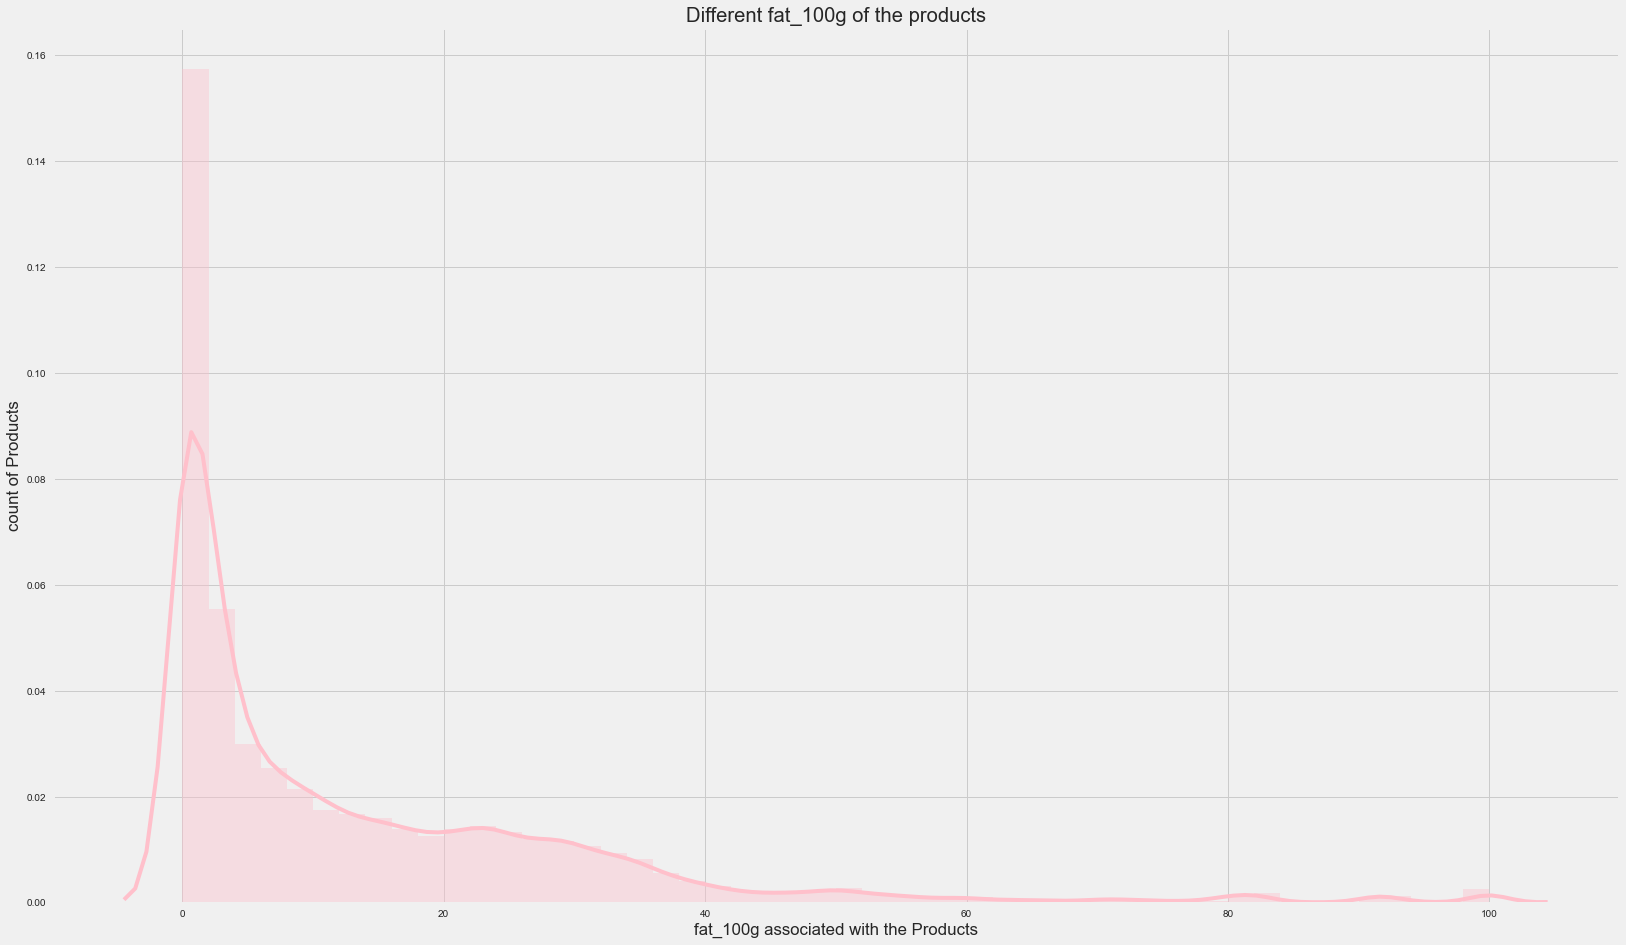

In [22]:
sns.distplot(data['fat_100g'], color = 'pink')
plt.title('Different fat_100g of the products')
plt.xlabel('fat_100g associated with the Products')
plt.ylabel('count of Products')
plt.show()

`show Different countries tags that these products come from`

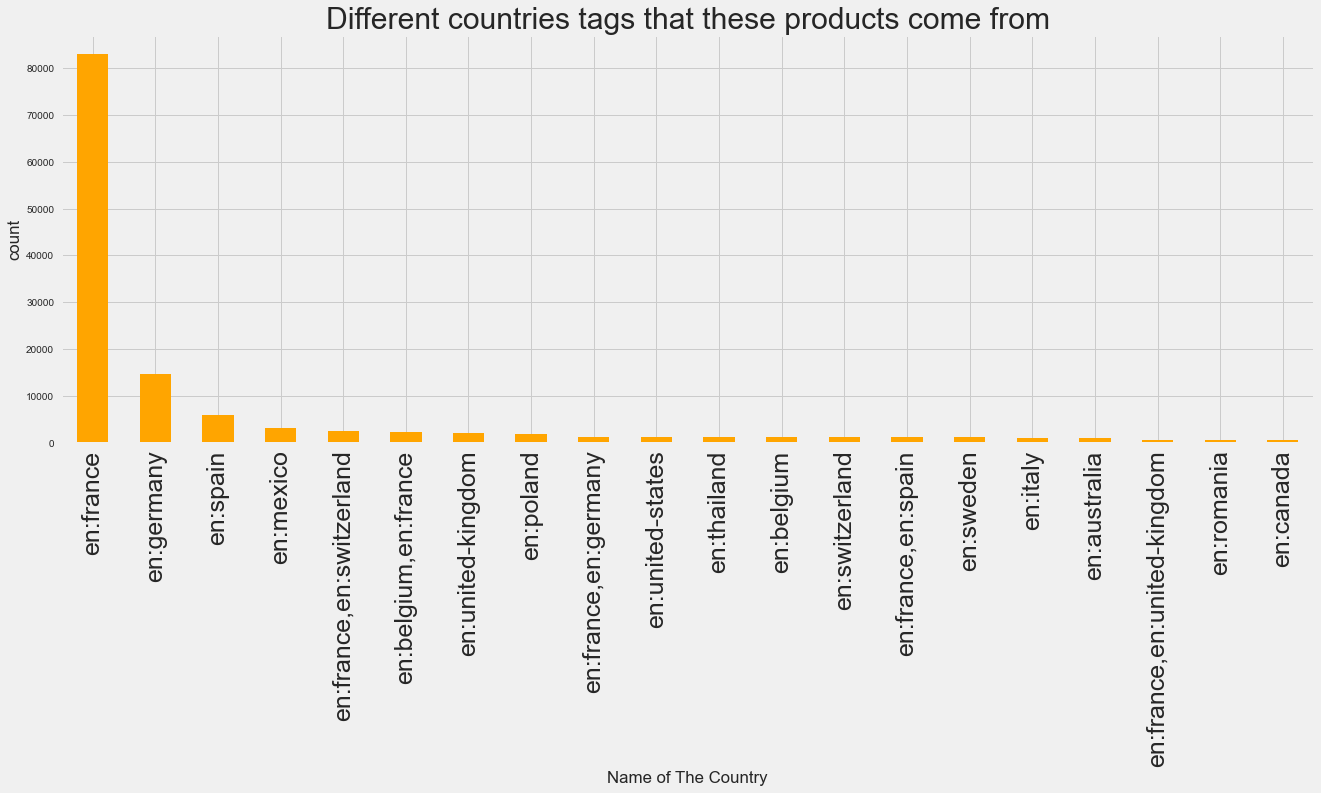

In [23]:
data['countries_tags'].value_counts().head(20).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different countries tags that these products come from', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.xticks(size = 25)
plt.show()

**show Different brands of the products**

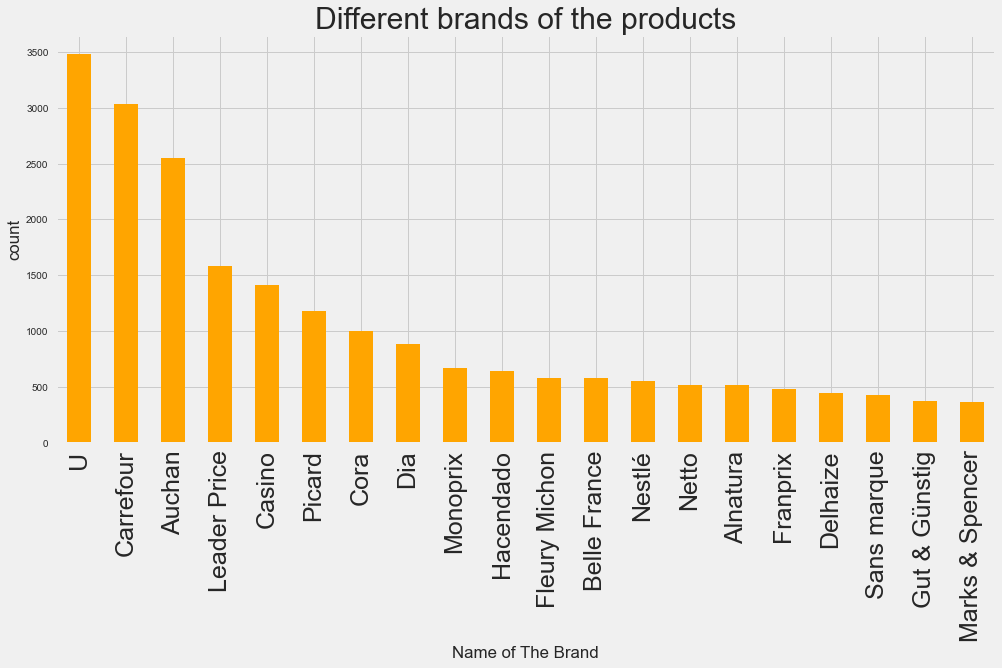

In [24]:
data['brands'].value_counts().head(20).plot.bar(color = 'orange', figsize = (15, 7))
plt.title('Different brands of the products', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Brand')
plt.ylabel('count')
plt.xticks(size = 25)
plt.show()

best product per each nutriscore_grade with their , pnns_groups_2, pnns_groups_1 and code  based on their  energy-kcal_100g


In [25]:
data.iloc[data.groupby(data['nutriscore_grade'])['energy-kcal_100g'].idxmax()][['nutriscore_grade','product_name','nova_group', 'pnns_groups_1',
                                                                    'pnns_groups_2','energy-kcal_100g']].style.background_gradient('Reds')


,nutriscore_grade,product_name,nova_group,pnns_groups_1,pnns_groups_2,energy-kcal_100g
126774,a,Amandino,1.000000,unknown,unknown,2785.000000
127232,b,Pâte Casareccia,1.000000,Cereals and potatoes,Cereals,1489.000000
143203,c,maple crunch,4.000000,unknown,unknown,1620.000000
13866,d,barres noisettes et chocolat equitable,3.000000,Sugary snacks,Biscuits and cakes,4614.000000
54682,e,les plaisirs gourmands palets 72% chocolat noir,4.000000,unknown,unknown,2483.000000


best product per each nutriscore_grade with their , pnns_groups_2, pnns_groups_1 and code  based on their  proteins_100g


In [26]:
data.iloc[data.groupby(data['nutriscore_grade'])['proteins_100g'].idxmax()][['nutriscore_grade','product_name','nova_group', 'pnns_groups_1',
                                                                    'pnns_groups_2','proteins_100g']].style.background_gradient('Blues')

,nutriscore_grade,product_name,nova_group,pnns_groups_1,pnns_groups_2,proteins_100g
98936,a,Dynamic Beta Alanin,nan,unknown,unknown,100.000000
26607,b,Sub Filets De Pangas Surgeles,nan,Fish Meat Eggs,Fish and seafood,92.000000
119763,c,Arroz a la poblana Great Value,4.000000,Cereals and potatoes,Cereals,291.000000
128971,d,Whey protein 100%,4.000000,unknown,unknown,90.000000
120081,e,Holland Kroon,4.000000,Milk and dairy products,Cheese,86.300000


**best product per each nutriscore_grade with their , pnns_groups_2, pnns_groups_1 and code  based on their  energy-kcal_100g**

In [27]:
data.iloc[data.groupby(data['nutriscore_grade'])['carbohydrates_100g'].idxmax()][['nutriscore_grade','product_name','nova_group', 'pnns_groups_1',
                                                                    'pnns_groups_2','carbohydrates_100g']].style.background_gradient('Reds')


,nutriscore_grade,product_name,nova_group,pnns_groups_1,pnns_groups_2,carbohydrates_100g
141268,a,ผงวุ้นอะการ์,nan,Fruits and vegetables,Vegetables,100.000000
302,b,Truvia,4.000000,unknown,unknown,133.000000
31057,c,Girasoli Ricotta Epinard,4.000000,Cereals and potatoes,Cereals,2834.000000
120142,d,SALSA AGRIDULCE CON CHILE,4.000000,Fat and sauces,Dressings and sauces,151.000000
4373,e,IncrediBulk Chocolate Fudge Cake,4.000000,unknown,unknown,231.000000


**picking up the countries_tags with highest number of products**

In [28]:
data['countries_tags'].value_counts().head(8)

en:france                   82923
en:germany                  14659
en:spain                     5871
en:mexico                    3130
en:france,en:switzerland     2483
en:belgium,en:france         2413
en:united-kingdom            2155
en:poland                    2001
Name: countries_tags, dtype: int64

**the most  countries_tags's products and their nutriscore_score**

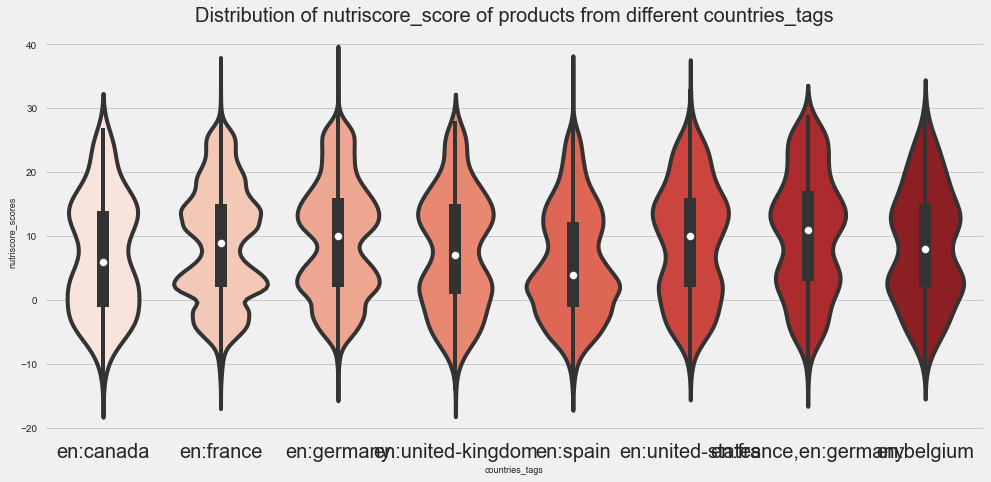

In [29]:
some_countries = ('en:france', 'en:united-states', 'en:spain', 'en:belgium', 'en:united-kingdom', 'en:germany',
                  'en:canada', 'en:france,en:germany')
data_countries = data.loc[data['countries_tags'].isin(some_countries) & data['nutriscore_score']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['countries_tags'], y = data_countries['nutriscore_score'], palette = 'Reds')
ax.set_xlabel(xlabel = 'countries_tags', fontsize = 9)
ax.set_ylabel(ylabel = 'nutriscore_scores', fontsize = 9)
ax.set_title(label = 'Distribution of nutriscore_score of products from different countries_tags', fontsize = 20)
plt.xticks(size = 20)
plt.show()

**Every countries_tags's Product and their energy-kcal_100g**

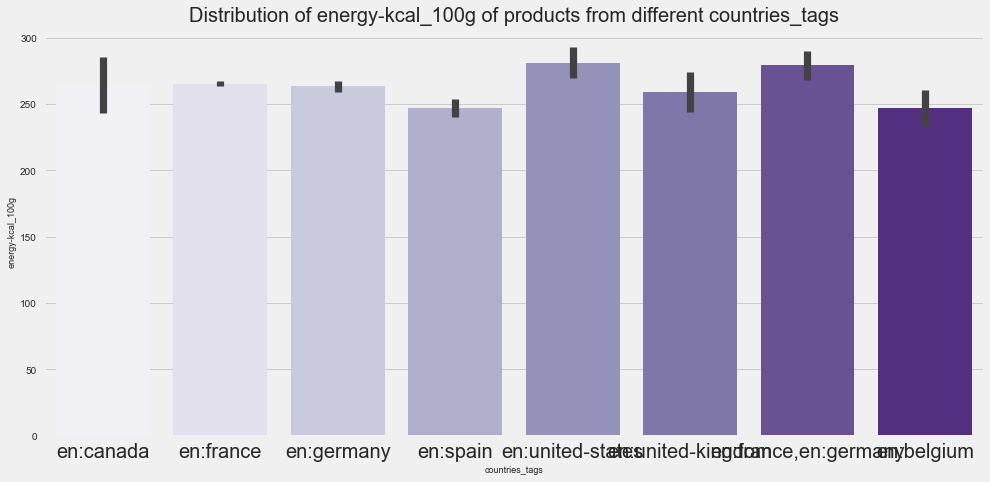

In [30]:
some_countries = ('en:france', 'en:united-states', 'en:spain', 'en:belgium', 'en:united-kingdom', 'en:germany',
                  'en:canada', 'en:france,en:germany')
data_countries = data.loc[data['countries_tags'].isin(some_countries) & data['energy-kcal_100g']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['countries_tags'], y = data_countries['energy-kcal_100g'],palette = 'Purples')
ax.set_xlabel(xlabel = 'countries_tags', fontsize = 9)
ax.set_ylabel(ylabel = 'energy-kcal_100g', fontsize = 9)
ax.set_title(label = 'Distribution of energy-kcal_100g of products from different countries_tags', fontsize = 20)
plt.xticks(size = 20)
plt.show()


**the the most used and popular product**

In [31]:
data['product_name'].value_counts().head(10)

Mayonnaise                    87
Huile d'olive vierge extra    64
Spaghetti                     64
Mozzarella                    61
Moutarde de Dijon             60
Pois chiches                  55
Jus de pomme                  54
Ketchup                       49
Lait de coco                  49
Orange                        48
Name: product_name, dtype: int64

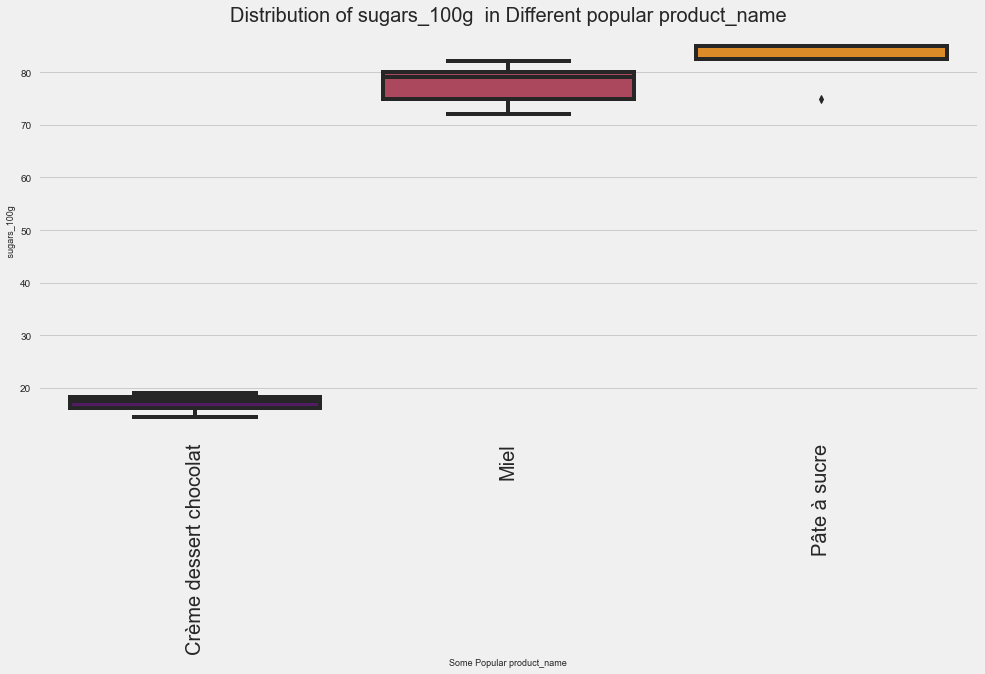

In [32]:
some_products = ('Pâte à sucre', 'The Madelaine Chocolate Company, Solid Milk Chocolate', 'Glaçage fondant'
                 , 'Colorant alimentaire', 'Pain aux 2 lins', 'Miel',
             'The Madelaine Chocolate Company, Solid Dark Chocolate', 'Crème dessert chocolat', 'Vitória crackers')

data_products = data.loc[data['product_name'].isin(some_products) & data['sugars_100g']]

ax = sns.boxplot(x = data_products['product_name'], y = data_products['sugars_100g'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular product_name', fontsize = 9)
ax.set_ylabel(ylabel = ' sugars_100g', fontsize = 9)
ax.set_title(label = 'Distribution of sugars_100g  in Different popular product_name', fontsize = 20)
plt.xticks(rotation = 90)
plt.xticks(size = 20)
plt.show()

**Distribution of nutriscore_score in some Popular products**

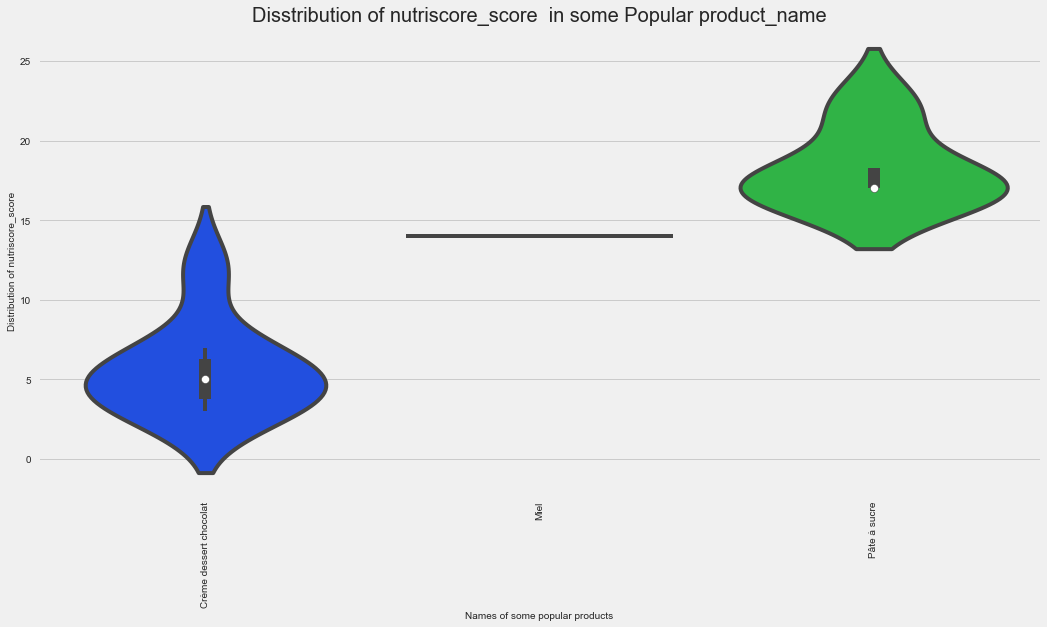

In [33]:
some_products = ('Pâte à sucre', 'The Madelaine Chocolate Company, Solid Milk Chocolate', 'Glaçage fondant', 'Colorant alimentaire',
                 'Pain aux 2 lins', 'Miel','The Madelaine Chocolate Company, Solid Dark Chocolate', 'Crème dessert chocolat', 'Vitória crackers')

data_products = data.loc[data['product_name'].isin(some_products) & data['nutriscore_score']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.violinplot(x = 'product_name', y = 'nutriscore_score', data = data_products, palette = 'bright')
ax.set_xlabel(xlabel = 'Names of some popular products', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of nutriscore_score', fontsize = 10)
ax.set_title(label = 'Disstribution of nutriscore_score  in some Popular product_name', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

 finding 15 poorest products from  Calcium


In [34]:
data.sort_values('calcium_100g', ascending = True)[['product_name','nutriscore_grade', 'code', 'nutriscore_score'
,'countries_tags', 'calcium_100g']].head(15).style.background_gradient('viridis')

,product_name,nutriscore_grade,code,nutriscore_score,countries_tags,calcium_100g
1,Salade Cesar,c,0000000290616,6.000000,en:canada,0.000000
102626,Mini Chips Ahoy!,e,4400002007,20.000000,en:united-states,0.000000
102673,おりたの知覧茶,nan,4521283000038,nan,en:japan,0.000000
127768,Sfornatini crunchy breadsticks with olive oil,d,8008685003226,12.000000,"en:france,en:united-states",0.000000
1816,Whole Wheat Crackers,d,0059290573497,17.000000,en:united-states,0.000000
1817,"Carr's, table water crackers, cracked pepper",c,0059290575927,6.000000,en:united-states,0.000000
5487,"Tomato basil flavored lentil chips, tomato basil",d,0858641003801,13.000000,en:united-states,0.000000
5486,Veggie Chips,c,0858641003030,10.000000,"en:singapore,en:united-states",0.000000
1830,Selection Peanut Butter 1KG Crunchy,d,0059749894456,15.000000,"en:canada,en:united-states",0.000000
103012,Клубничное,c,4620006811620,8.000000,"en:france,en:russia",0.000000


finding 15 richest products from  Calcium

In [35]:

data.sort_values('calcium_100g', ascending = False)[['product_name','nutriscore_grade', 'code', 'nutriscore_score',
                                                   'countries_tags', 'calcium_100g']].head(15).style.background_gradient('viridis')

,product_name,nutriscore_grade,code,nutriscore_score,countries_tags,calcium_100g
116623,גבינת עיזים הולנדית,e,7296073273424,19.000000,en:israel,779.000000
134357,Biocookies baby,nan,8437017049104,nan,en:spain,269.360000
141757,Hutsun flaovored milk chocolate,nan,8904057396739,nan,en:india,236.000000
118864,Yoghurt Batido Light Natural 1 KG.,d,7501040090394,12.000000,en:mexico,231.000000
120346,Silk Almendra sin azucar sin endulzar Alto en proteína,c,7506443103993,7.000000,nan,165.000000
40422,Mélange source de calcium,a,3256226399559,-1.000000,en:france,159.000000
18130,Straggisto,a,3033490004750,-1.000000,en:france,148.000000
128357,Rice dessert cacao,c,8019428009023,4.000000,"en:hungary,en:romania,en:slovenia,en:uruguay",120.000000
64000,Soja saveur vanille,b,3456774824873,2.000000,en:france,120.000000
119517,Leche Light,b,7501295600140,0.000000,en:mexico,120.000000


finding 15 poorest products from  Energie

In [36]:
data.sort_values('energy-kcal_100g', ascending = True)[['product_name', 'nutriscore_grade','code', 'nutriscore_score',
                                                      'countries_tags', 'energy-kcal_100g']].head(15).style.background_gradient('viridis')

,product_name,nutriscore_grade,code,nutriscore_score,countries_tags,energy-kcal_100g
0,Naturablue original,nan,0000000020114,nan,en:france,0.000000
106490,Daily Vitamins,b,5055534301593,0.000000,en:france,0.000000
5782,Top of the Rock Spring Water,a,112101,0.000000,en:united-states,0.000000
106476,Zéro citrus flavour,c,50551866,4.000000,"en:france,en:italy",0.000000
124926,Aceite de oliva,a,7702109013655,-5.000000,en:spain,0.000000
134369,Fraise,a,8438001479020,-1.000000,en:france,0.000000
134365,Fetén La Sal de Murcia,b,8437020253024,0.000000,en:spain,0.000000
134364,Fetén La Sal de Murcia,b,8437020253017,0.000000,en:spain,0.000000
5744,Herbal Aloe Concentrado,b,1065,0.000000,"en:brazil,en:france,en:israel,en:italy,en:mexico,en:norway,en:united-states,en:argentina-espanol,en:armenia-pyсский,en:aruba-espanol,en:asia-pacific,en:australia-english,en:austria-deutsch,en:azerbaijan-русский,en:belarus-pyсский,en:belgium-francais,en:belgium-nederlands,en:bolivia-espanol,en:bosnia-i-hercegovina-bosnian,en:botswana-english,en:brazil-portugues,en:bulgaria-български,en:cambodia-english,en:cambodia-ភាសាខ្មែរ,en:canada-english,en:canada-francais,en:chile-espanol,en:china-中文,en:colombia-espanol,en:costa-rica-espanol,en:croatia-hrvatski,en:cyprus-ελληνικά,en:czech-republic-čeština,en:denmark-dansk,en:ecuador-espanol,en:el-salvador-espanol,en:estonia-eesti,en:europe,en:finland-suomi,en:france-francais,en:georgia-ქართული,en:germany-deutsch,en:ghana-english,en:greece-ελληνικά,en:guatemala-espanol,en:honduras-espanol,en:hong-kong-粵語,en:hungary-magyar,en:iceland-islenska,en:india-english,en:indonesia-bahasa-indonesia,en:ireland-english,en:israel-עברית,en:italy-italiano,en:jamaica-english,en:japan-日本語,en:kazakhstan-pyсский,en:korea-한국어,en:kyrgyzstan-русский,en:latvia-latviešu,en:lebanon-english,en:lesotho-english,en:lithuania-lietuvių,en:macau-中文,en:malaysia-bahasa-melayu,en:malaysia-english,en:malaysia-中文,en:mexico-espanol,en:middle-east-africa,en:moldova-roman,en:mongolia-монгол-хэл,en:namibia-english,en:netherlands-nederlands,en:new-zealand-english,en:nicaragua-espanol,en:north-macedonia-македонски-јазик,en:norway-norsk,en:panama-espanol,en:paraguay-espanol,en:peru-espanol,en:philippines-english,en:poland-polski,en:portugal-portugues,en:puerto-rico-espanol,en:republica-dominicana-espanol,en:romania-romană,en:russia-русский,en:serbia-srpski,en:singapore-english,en:slovak-republic-slovenčina,en:slovenia-slovene,en:south-africa-english,en:spain-espanol,en:swaziland-english,en:sweden-svenska,en:switzerland-deutsch,en:switzerland-francais,en:taiwan-中文,en:thailand-ไทย,en:trinidad-tobago-english,en:turkey-turkce,en:ukraine-yкраї́нська,en:united-kingdom-english,en:united-states-english,en:united-states-espanol,en:uruguay-espanol,en:venezuela-espanol,en:vietnam-tiếng-việt,en:zambia-english",0.000000
962,Yellow mustard,nan,0035826088017,nan,en:united-states,0.000000


**Finding 15 richest products from  Energie**

In [37]:
data.sort_values('energy-kcal_100g', ascending = False)[['product_name', 'nutriscore_grade','code', 
                                                       'nutriscore_score','countries_tags', 'energy-kcal_100g']].head(15).style.background_gradient('viridis')

,product_name,nutriscore_grade,code,nutriscore_score,countries_tags,energy-kcal_100g
128186,trancio verace con speck,nan,8015673024897,nan,en:italy,25710.000000
13866,barres noisettes et chocolat equitable,d,25168242,12.000000,en:france,4614.000000
1436,Vegetable stock,nan,0048001006973,nan,en:canada,4330.000000
126774,Amandino,a,8002352000112,-1.000000,en:italy,2785.000000
119286,Chocolate en polvo,nan,7501059296367,nan,en:mexico,2660.000000
79249,fine et gourmande Noir 70%,d,3664346306621,11.000000,en:france,2550.000000
54682,les plaisirs gourmands palets 72% chocolat noir,e,3328865151604,26.000000,en:new-caledonia,2483.000000
142897,"chips, original",d,9310015241888,14.000000,en:australia,2290.000000
95850,Zabaione,d,4059300688513,16.000000,en:germany,2258.000000
10533,Földimogyorós szelet kesudióval,e,20535414,22.000000,en:hungary,2256.000000


In [38]:
def productdata(x):
    return data.loc[x,:]

x = productdata(233)  
pd.set_option('display.max_rows', 200)
x = pd.DataFrame(x)
print(x)

                                                                  233
code                                                    0011645004315
url                 http://world-fr.openfoodfacts.org/produit/0011...
product_name                                          Honey Soy Drink
brands                                            Sacramento Tofu Co.
categories          Plant-based foods and beverages, Beverages, Pl...
countries_tags                                       en:united-states
additives_tags                                                    NaN
nutriscore_score                                                    0
nutriscore_grade                                                    b
nova_group                                                          3
pnns_groups_1                                               Beverages
pnns_groups_2                            Plant-based milk substitutes
states              en:to-be-checked, en:complete, en:nutrition-fa...
energy-kcal_100g    